<a href="https://colab.research.google.com/github/UCEMA-QUANt/Data-Science-for-Finance/blob/master/06_prediccion_finanzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
%matplotlib inline

import pandas as pd
from pandas_datareader import DataReader as pdr

import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.rcParams["figure.figsize"] = (20, 10)

In [66]:
data = pdr(['COME.BA', 'GGAL.BA', "ALUA.BA", '^MERV'], start='2010', end='2021', data_source='yahoo')
data.head()

Attributes Adj Close                      ...     Volume                 
Symbols      COME.BA   GGAL.BA   ALUA.BA  ...    GGAL.BA    ALUA.BA ^MERV
Date                                      ...                            
2010-01-04  0.120409  2.097993  2.117607  ...  1485340.0  1043630.0   0.0
2010-01-05  0.129229  2.155736  2.117607  ...  2624534.0  1004553.0   0.0
2010-01-06  0.125778  2.069122  2.053276  ...  3233258.0   686971.0   0.0
2010-01-07  0.128462  2.107617  2.117607  ...  2773188.0   692148.0   0.0
2010-01-08  0.124627  2.059498  2.085438  ...  1289394.0   610007.0   0.0

[5 rows x 24 columns]

In [67]:
data["Adj Close"]

Symbols,COME.BA,GGAL.BA,ALUA.BA,^MERV
Date,,,,
2010-01-04,0.120409,2.097993,2.117607,2384.489990
2010-01-05,0.129229,2.155736,2.117607,2401.750000
2010-01-06,0.125778,2.069122,2.053276,2362.459961
2010-01-07,0.128462,2.107617,2.117607,2389.449951
2010-01-08,0.124627,2.059498,2.085438,2352.760010
...,...,...,...,...
2020-10-30,2.380000,96.400002,51.400002,45290.019531
2020-11-02,2.500000,107.849998,51.500000,47467.648438
2020-11-03,2.590000,108.849998,49.900002,47965.308594


In [103]:
data.xs('COME.BA', level=1, axis=1, drop_level=True)

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,0.120409,0.136832,0.137268,0.135089,0.135089,1139059.0
2010-01-05,0.129229,0.146855,0.146855,0.136832,0.138575,4113368.0
2010-01-06,0.125778,0.142933,0.145983,0.139446,0.145983,1575136.0
2010-01-07,0.128462,0.145983,0.145983,0.139446,0.143368,987856.0
2010-01-08,0.124627,0.141625,0.145983,0.141625,0.145983,503612.0
...,...,...,...,...,...,...
2020-10-30,2.380000,2.380000,2.500000,2.370000,2.480000,4566074.0
2020-11-02,2.500000,2.500000,2.520000,2.360000,2.420000,3583367.0
2020-11-03,2.590000,2.590000,2.650000,2.520000,2.520000,3235106.0


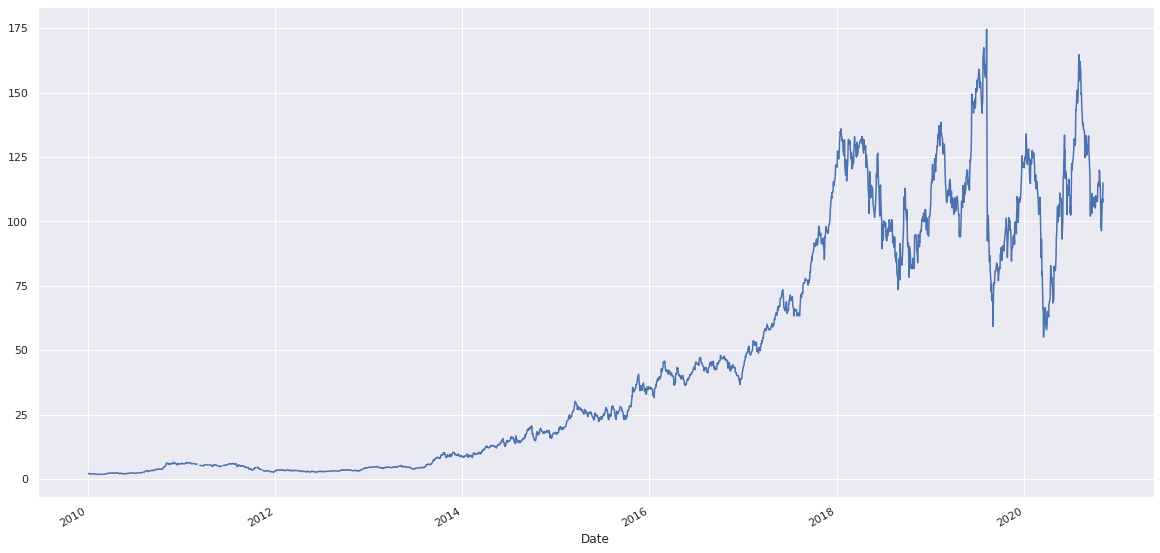

In [28]:
data[("Adj Close", "GGAL.BA")].plot();

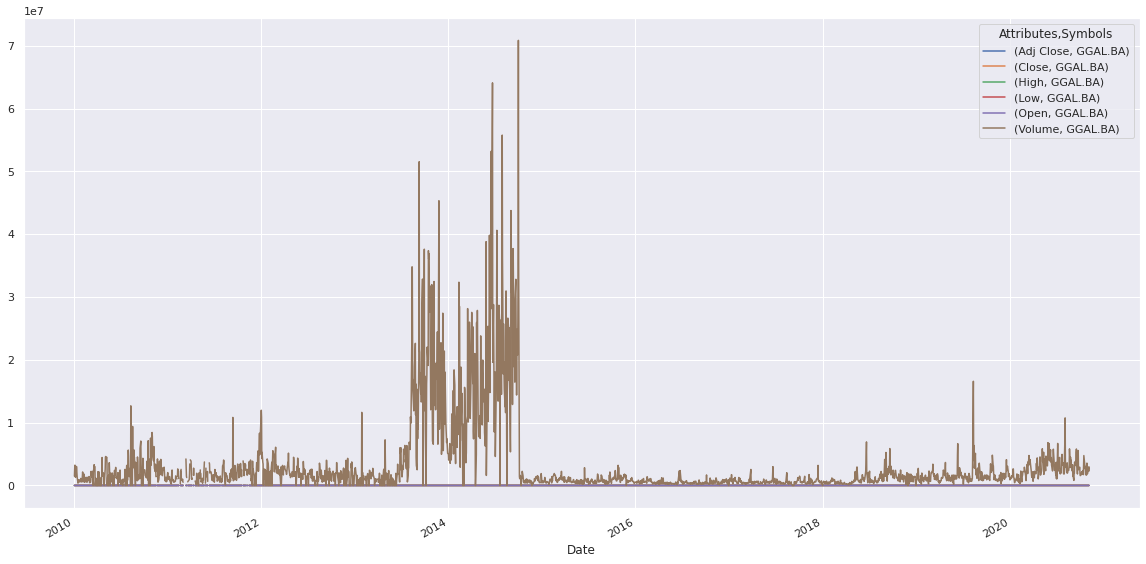

In [29]:
data.loc[:, data.columns.get_level_values(1)=="GGAL.BA"].plot()

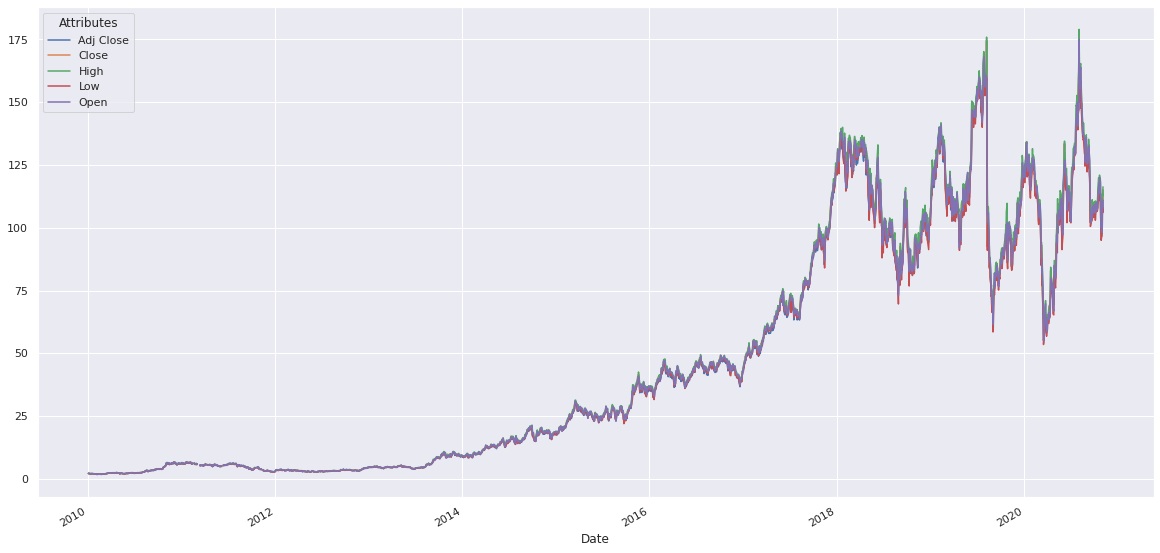

In [45]:
ggal  = data.loc[:, data.columns.get_level_values(1)=="GGAL.BA"]
ggal.columns = ggal.columns.get_level_values(0)
ggal.drop("Volume", axis=1).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ee1422d30>,
      dtype=object)

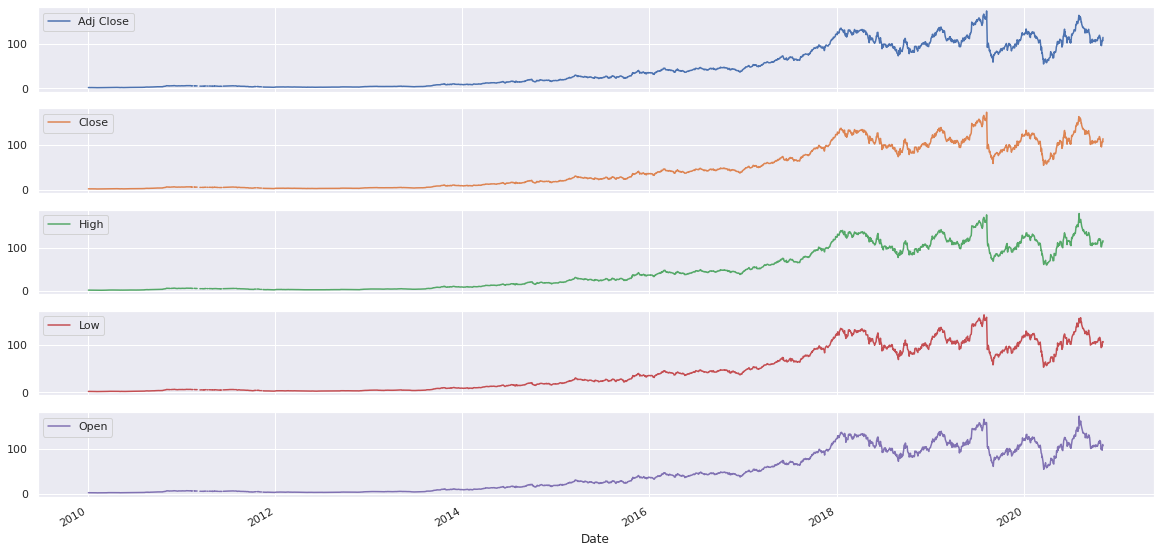

In [46]:
ggal.drop("Volume", axis=1).plot(subplots=True)

In [52]:
import plotly.figure_factory
fig = plotly.figure_factory.create_candlestick(ggal.Open, ggal.High, ggal.Low, ggal.Close, dates=ggal.index)
fig.show()

In [53]:
ggal["Adj Close"].rolling(7).mean().head(20)

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
2010-01-11         NaN
2010-01-12    2.051249
2010-01-13    2.032002
2010-01-14    2.015504
2010-01-15    2.011379
2010-01-18    2.003130
2010-01-19    2.005880
2010-01-20    2.014129
2010-01-21    2.030627
2010-01-22    2.034751
2010-01-25    2.025127
2010-01-26    2.014129
2010-01-27    2.003130
2010-01-28    1.983882
2010-01-29    1.974259
Name: Adj Close, dtype: float64

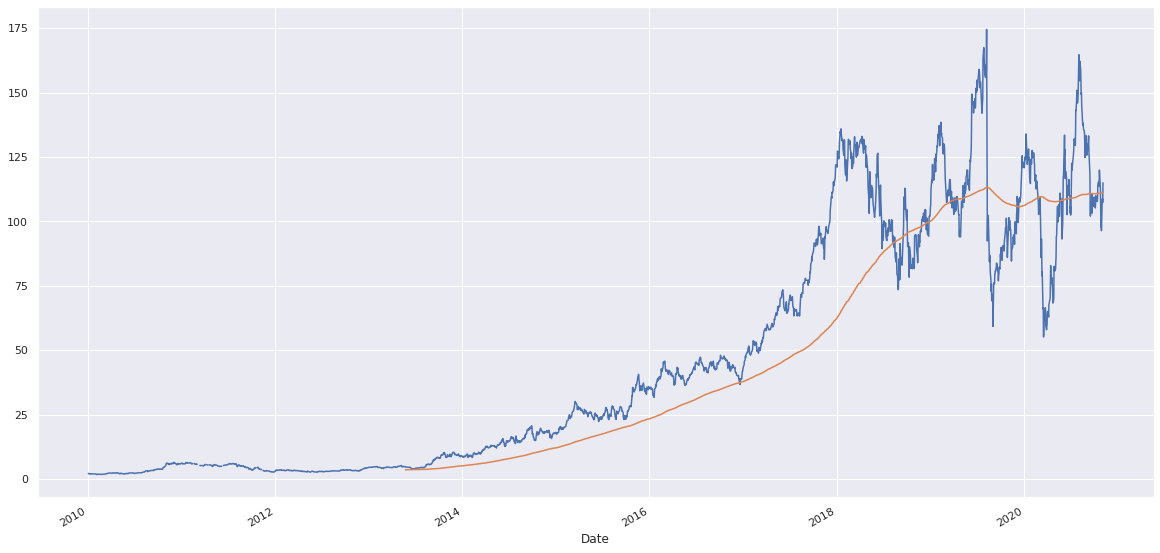

In [55]:
ggal["Adj Close"].plot();
ggal["Adj Close"].rolling(365).mean().plot();

In [56]:
ggal["Adj Close"].resample('1Y').mean()

Date
2010-12-31      3.118710
2011-12-31      4.934204
2012-12-31      3.236376
2013-12-31      6.001772
2014-12-31     14.174571
2015-12-31     26.604944
2016-12-31     41.763759
2017-12-31     71.092245
2018-12-31    107.379292
2019-12-31    112.465393
2020-12-31    111.505556
Freq: A-DEC, Name: Adj Close, dtype: float64

In [57]:
ggal["Adj Close"].resample('1Y').last()

Date
2010-12-31      5.832036
2011-12-31      2.761872
2012-12-31      4.355260
2013-12-31      9.043865
2014-12-31     17.972157
2015-12-31     35.853096
2016-12-31     41.722523
2017-12-31    121.906052
2018-12-31    101.974579
2019-12-31    121.599998
2020-12-31    115.000000
Freq: A-DEC, Name: Adj Close, dtype: float64

In [58]:
ggal["Adj Close"].resample('BA').last()

Date
2010-12-31      5.832036
2011-12-30      2.761872
2012-12-31      4.355260
2013-12-31      9.043865
2014-12-31     17.972157
2015-12-31     35.853096
2016-12-30     41.722523
2017-12-29    121.906052
2018-12-31    101.974579
2019-12-31    121.599998
2020-12-31    115.000000
Freq: BA-DEC, Name: Adj Close, dtype: float64

In [64]:
ggal["Adj Close"].asfreq('BA')

Date
2010-12-31           NaN
2011-12-30           NaN
2012-12-31           NaN
2013-12-31           NaN
2014-12-31           NaN
2015-12-31           NaN
2016-12-30     41.722523
2017-12-29           NaN
2018-12-31    101.974579
2019-12-31           NaN
Freq: BA-DEC, Name: Adj Close, dtype: float64

In [63]:
ggal.loc["2019-12-20":"2019-12-31"]

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-12-20,109.849998,109.849998,110.500000,107.949997,109.199997,2316389.0
2019-12-23,117.449997,117.449997,117.849998,111.000000,111.000000,3063612.0
2019-12-26,125.500000,125.500000,128.800003,119.000000,119.000000,2222622.0
2019-12-27,120.949997,120.949997,128.100006,119.300003,126.000000,1419035.0
2019-12-30,121.599998,121.599998,122.000000,116.050003,120.000000,1880958.0


In [68]:
ggal["Adj Close"].asfreq("1d")

Date
2010-01-04      2.097993
2010-01-05      2.155736
2010-01-06      2.069122
2010-01-07      2.107617
2010-01-08      2.059498
                 ...    
2020-11-01           NaN
2020-11-02    107.849998
2020-11-03    108.849998
2020-11-04    107.349998
2020-11-05    115.000000
Freq: D, Name: Adj Close, Length: 3959, dtype: float64

In [69]:
ggal["Adj Close"].asfreq("1d").fillna(method="pad").asfreq('BA')

Date
2010-12-31      5.832036
2011-12-30      2.761872
2012-12-31      4.355260
2013-12-31      9.043865
2014-12-31     17.972157
2015-12-31     35.853096
2016-12-30     41.722523
2017-12-29    121.906052
2018-12-31    101.974579
2019-12-31    121.599998
Freq: BA-DEC, Name: Adj Close, dtype: float64

### Time-shifts

Para desfaces padnas tiene dos metodos: ``shift()`` and ``tshift()``.

``shift()`` mueve los datos mientras que  ``tshift()``mueve los indeices¿

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

tshift is deprecated and will be removed in a future version. Please use shift instead.



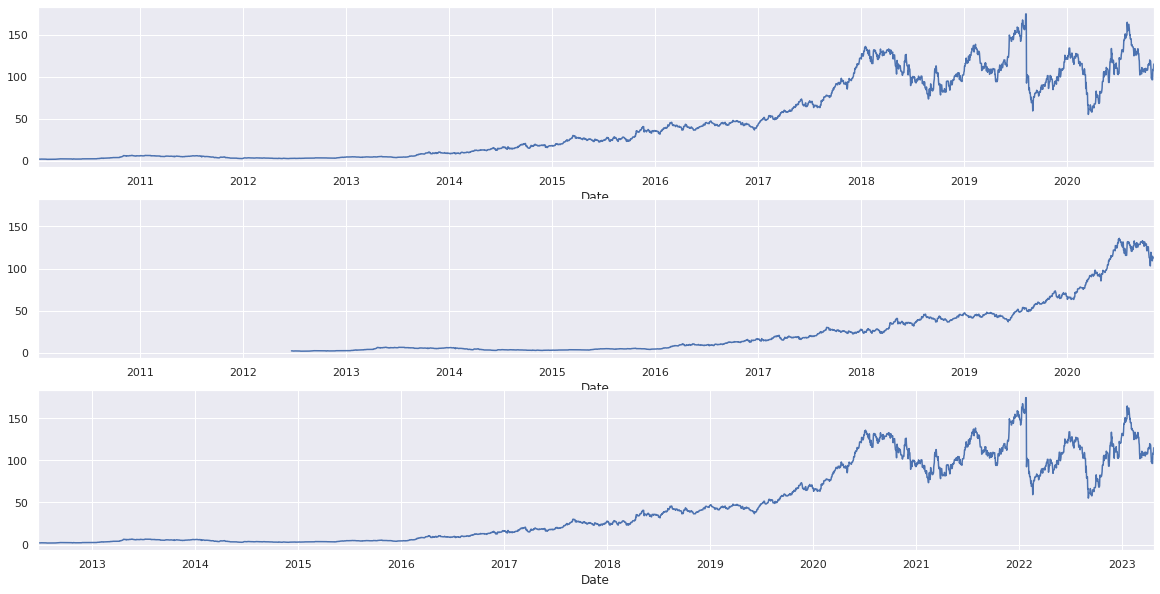

In [74]:
fig, ax = plt.subplots(3, sharey=True)

close = ggal["Adj Close"].resample("D").mean().fillna(method="pad")
close.plot(ax=ax[0])
close.shift(900).plot(ax=ax[1])
close.tshift(900).plot(ax=ax[2])

In [80]:
capm = pd.concat([ggal["Adj Close"].rename("ggal"), data[("Adj Close", "^MERV")].rename("merv")], axis=1)
capm.head()

,ggal,merv
Date,,
2010-01-04,2.097993,2384.489990
2010-01-05,2.155736,2401.750000
2010-01-06,2.069122,2362.459961
2010-01-07,2.107617,2389.449951
2010-01-08,2.059498,2352.760010


In [81]:
capm = capm.pct_change()
capm.head()

,ggal,merv
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.027523,0.007238
2010-01-06,-0.040179,-0.016359
2010-01-07,0.018605,0.011425
2010-01-08,-0.022831,-0.015355


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



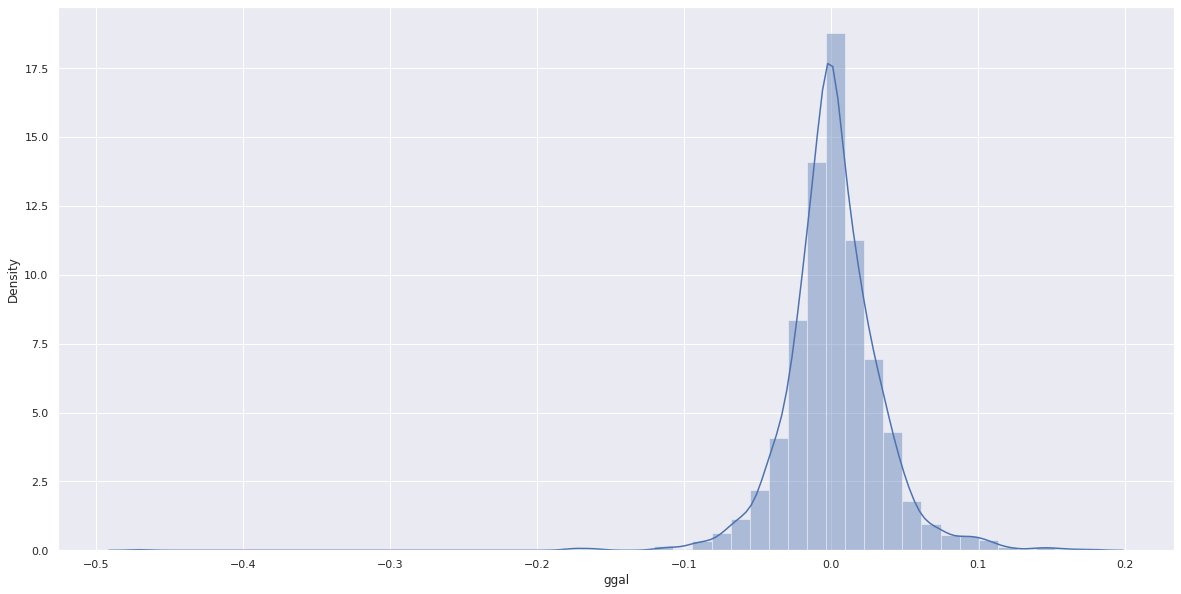

In [86]:
seaborn.distplot(capm.ggal.dropna())

In [87]:
capm.ggal.mean(), capm.ggal.std()

(0.0020774382846340607, 0.033051872519078006)

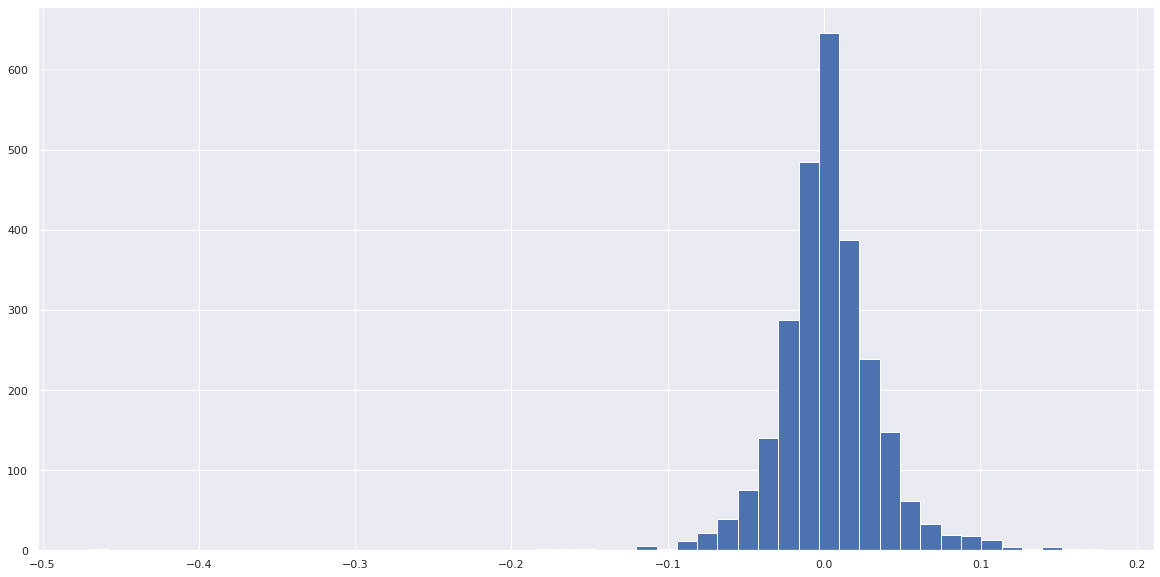

In [88]:
capm.ggal.hist(bins=50)

In [89]:
capm = capm[capm.isnull().sum(axis=1) == 0]
capm

,ggal,merv
Date,,
2010-01-05,0.027523,0.007238
2010-01-06,-0.040179,-0.016359
2010-01-07,0.018605,0.011425
2010-01-08,-0.022831,-0.015355
2010-01-11,-0.042056,-0.014885
...,...,...
2020-10-30,-0.041273,0.008367
2020-11-02,0.118776,0.048082
2020-11-03,0.009272,0.010484


In [90]:
from sklearn import linear_model

In [93]:
model = linear_model.LinearRegression()
model.fit(capm[["merv"]], capm.ggal)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
model.coef_ , model.intercept_ 

(array([1.17726469]), 0.0004083979351256063)

In [120]:
def rolling_window(data, size):
  for i, idx in enumerate(data.index):
    if i > size:
      yield data.loc[data.index[i - size]:data.index[i]]

In [121]:
for a in rolling_window(ggal, 5):
  break

In [122]:
a

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-05,2.155736,2.24,2.27,2.18,2.18,2624534.0
2010-01-06,2.069122,2.15,2.20,2.13,2.18,3233258.0
2010-01-07,2.107617,2.19,2.20,2.12,2.14,2773188.0
2010-01-08,2.059498,2.14,2.17,2.12,2.17,1289394.0
2010-01-11,1.972884,2.05,2.14,2.03,2.13,2014212.0
2010-01-12,1.895893,1.97,2.04,1.95,2.04,3018629.0
